# Partial differential equations

### Numerical differentiation: Forward and backward differences

Derivative definition:
    $$
    \frac{df}{dx}=\lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}
    $$
We take a small h, this is the forward difference
    $$
    \frac{df}{dx}\approx \frac{f(x+h)-f(x)}{h}
    $$


The mirrored expression is the backwards difference
    $$
    \frac{df}{dx}\approx \frac{f(x)-f(x-h)}{h}
    $$


### Central differences

This improves the approximation
    $$
    \frac{df}{dx}\approx \frac{f(x+\frac{h}{2})-f(x-\frac{h}{2})}{h}
    $$

In [1]:
from math import *

def derivada(f,x, h = 1e-8):
    return (f(x+h/2)-f(x-h/2))/h

print(derivada(cos,0)) # 0.0
print(derivada(cos,pi/2)) # -0.999999993923

0.0
-0.999999993922529


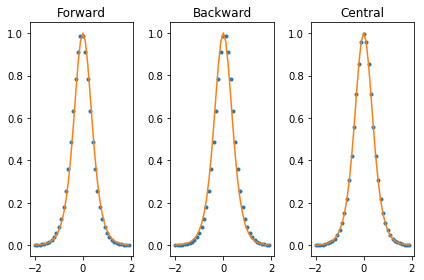

In [3]:
from pylab import *

def forward(f,x, h = 1e-4):
    return (f(x+h)-f(x))/h

def backward(f,x, h = 1e-4):
    return (f(x)-f(x-h))/h

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

f=lambda x:1+0.5*tanh(2*x)
lista_forward=[]
lista_backward=[]
lista_derivada=[]
x=arange(-2,2,0.1)
for i in x:
    lista_forward.append(forward(f,i,1e-1))
    lista_backward.append(backward(f,i,1e-1))
    lista_derivada.append(derivada(f,i,1e-1))
    

subplot(1,3,1)
plot(x,lista_forward,'.')
plot(x,(1-tanh(2*x)**2))
title('Forward')

subplot(1,3,2)
plot(x,lista_backward,'.')
plot(x,(1-tanh(2*x)**2))
title('Backward')


subplot(1,3,3)
plot(x,lista_derivada,'.')
plot(x,(1-tanh(2*x)**2))
title('Central')

tight_layout()
show()

### Second derivative



Forward difference
$$
    \frac{df}{dx}\approx \frac{f(x+h)-f(x)}{h}
$$
Backwards
$$
    \frac{df}{dx}\approx \frac{f(x)-f(x-h)}{h}
$$

Using the forward and backwards differences for the terms in the second derivative definition

$$
    \frac{d^2f}{dx^2}\approx \frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h}=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}
$$

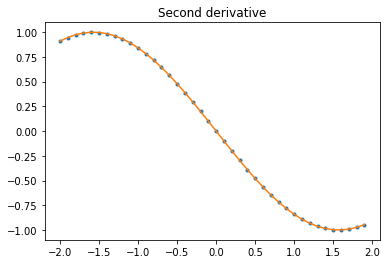

In [4]:
from pylab import *

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:sin(x)

lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista_derivada_2.append(derivada_2(f,i,1e-1))

plot(x,lista_derivada_2,'.')
plot(x,(-sin(x)))
title('Second derivative')

show()

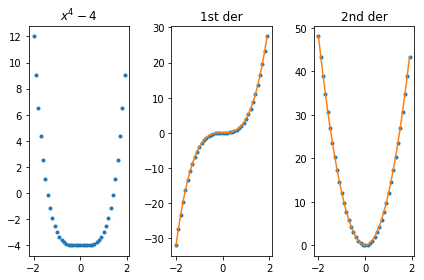

In [5]:
from pylab import *

def derivada(f,x, h = 1e-4):
    return (f(x+h/2)-f(x-h/2))/h

def derivada_2(f,x, h = 1e-4):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

f=lambda x:(x)**4-4

lista=[]
lista_derivada=[]
lista_derivada_2=[]
x=arange(-2,2,0.1)
for i in x:
    lista.append(f(i))
    lista_derivada.append(derivada(f,i))
    lista_derivada_2.append(derivada_2(f,i))

subplot(1,3,1)
plot(x,lista,'.')
title('$x^4-4$')
    
subplot(1,3,2)
plot(x,lista_derivada,'.')
plot(x,4*x**3)
title('1st der')

subplot(1,3,3)
plot(x,lista_derivada_2,'.')
plot(x,12*x**2)
title('2nd der')

tight_layout()
show()

# PDEs

## Laplace equaiton

Electrostatic potential $\phi$ in the abscence of free charge:

$$
\nabla^2 \phi =0
$$
In cartesian coordinates
$$
\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2}
$$

First we analyse the relaxation method

### Relaxation

We consider a bidimensional plate plate with boundary conditions: a certain constant potential on the top edge.

We use the expression for the second derivative for each dimension.

$$
\frac{\partial^2\phi(x,y)}{\partial x^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2}
$$

y

$$
\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}
$$

Using Laplace equation

$$
\nabla^2 \phi= \frac{\partial^2\phi(x,y)}{\partial y^2} +\frac{\partial^2\phi(x,y)}{\partial y^2} = \frac{\phi(x+a,y)-2\phi(x,y)+\phi(x-a,y)}{a^2} + \frac{\phi(x,y+a)-2\phi(x,y)+\phi(x,y-a)}{a^2}=0
$$

We arrive at

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0
$$

We have a grid of squares size $a$ for which we have to solve the eq. We thus have a system of N equations that we'll solve simultaneously with the relaxation method

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right]
$$

Box size 1m, top edge at a constant 1 volt. Let a=1cm and N=100.

As an example, for $\phi(x,y,z)$

$$
\phi(x,y) =\frac{1}{6}\left[\phi(x+a,y,z)+\phi(x-a,y,z)+\phi(x,y+a,z)+\phi(x,y-a,z)+\phi(x,y,z+a)+\phi(x,y,z-a) \right]
$$

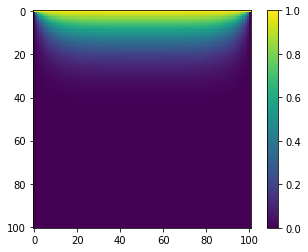

In [6]:
from pylab import *
M,V=100,1.0
# Max number of iterations
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
delta=1.0
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            if i==0 or i==M or j==0 or j==M:
                phi_1[i,j]=phi[i,j] #boundary
            else:
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    phi,phi_1=phi_1,phi #updating
    
imshow(phi)
#gray()
colorbar()
show()

Now if the right edge is also at 1 V

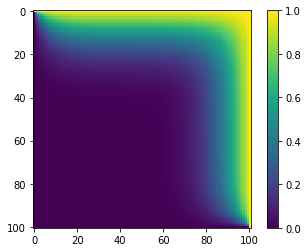

In [7]:
M,V=100,1.0
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi[:,M]=V
phi_1=zeros([M+1,M+1],float)
delta=1.0
for iteracion in range(0, maxIter):
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phi_1[i,j]=phi[i,j] 
            else:
                phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    phi,phi_1=phi_1,phi 
    
imshow(phi)
#gray()
colorbar()
show()

# Poisson equation

$$
\nabla ^2 \phi = -\frac{\rho}{\epsilon_0}
$$

Using the relaxation method

$$
\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=-\frac{\rho(x,y)}{\epsilon_0}
$$

We reorder terms to find $\phi(x,y)$

$$
\phi(x,y) =\frac{1}{4}\left[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a) \right] + \frac{a^2}{4\epsilon_0}\rho(x,y)
$$

We define some charge distributions

In [8]:
from pylab import *
import time

t0 = time.time()

M,V=100,1.0

def ro2(x,y):
    if x>0.6 and x<0.8 and y>0.6 and y<0.8:
        return 1
    elif x>0.2 and x<0.4 and y>0.2 and y<0.4:
        return -1
    else:
        return 0
    
def ro3(x,y):
    c1=np.array([0.7,0.7])
    c2=np.array([0.3,0.3])
    myP=np.array([x,y])
    r=0.2
    if np.linalg.norm(c1-myP) <= r:
        return 1
    elif np.linalg.norm(c2-myP) <= r/2:
        return -1
    else:
        return 0

def ro4(x,y):
    if ((y>0.2 and y<0.4) or (y>0.6 and y<0.8)) and x>0.6 and x<0.8:
        return 2
    
    elif y>0.3 and y<0.7 and x>0.3 and x<0.7:
        return -1
    else:
        return 0
    pass

def ro5(x,y):
    c1=np.array([0.5,0.5])
    myP=np.array([x,y])
    r1=0.1
    r2=0.2
    r3=0.3
    r4=0.4
    if np.linalg.norm(c1-myP) <= r1:
        return 1
    elif np.linalg.norm(c1-myP) <= r2:
        return 0
    if np.linalg.norm(c1-myP) <= r3:
        return -1
    if np.linalg.norm(c1-myP) <= r4:
        return 0
    else:
        return 0

def ro6(x,y):
    c1=np.array([0.5,0.5])
    myP=np.array([x,y])
    r1=0.1
    r2=0.2
    r3=0.3
    r4=0.4
    r5=0.5
    myNorm=np.linalg.norm(c1-myP)
    if myNorm <= r1:
        return 1
    elif myNorm <= r2:
        return 0
    if myNorm <= r3:
        return -1
    if myNorm <= r4:
        return 0
    if myNorm <= r5:
        return 1
    else:
        return 0


We try to create a Mickey Mouse.

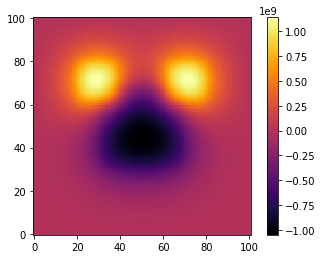

--- 46.10868978500366 seconds ---


In [9]:
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
a=0.01
epsilon=8.85e-12
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                        phi[i,j-1])/4+(a**2)/(4*epsilon)*ro4(i*a,j*a)

    phi,phi_1=phi_1,phi 
    

imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s seconds ---" % (time.time()  -  t0))

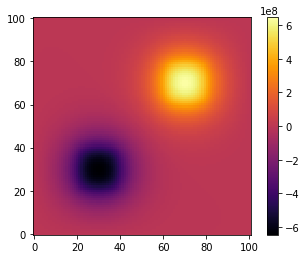

--- 120.91361999511719 seconds ---


In [10]:
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
a=0.01
epsilon=8.85e-12
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                        phi[i,j-1])/4+(a**2)/(4*epsilon)*ro2(i*a,j*a)

    phi,phi_1=phi_1,phi 
    

imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s seconds ---" % (time.time()  -  t0))

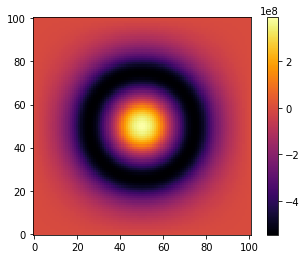

--- 317.68656611442566 seconds ---


In [11]:
maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
a=0.01
epsilon=8.85e-12
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                        phi[i,j-1])/4+(a**2)/(4*epsilon)*ro5(i*a,j*a)

    phi,phi_1=phi_1,phi 
    

imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s seconds ---" % (time.time()  -  t0))

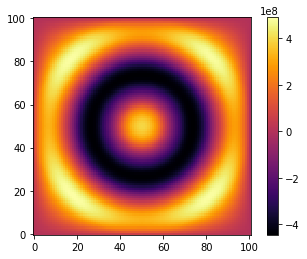

--- 429.4137032032013 seconds ---


In [12]:

maxIter = 500
phi=zeros([M+1,M+1],float)
phi[0,:]=V
phi_1=zeros([M+1,M+1],float)
a=0.01
epsilon=8.85e-12
for iteracion in range(0, maxIter):
    for i in range(M):
        for j in range(M):
            phi_1[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+\
                        phi[i,j-1])/4+(a**2)/(4*epsilon)*ro6(i*a,j*a)

    phi,phi_1=phi_1,phi 
    

imshow(phi,origin='lower')
#set_cmap("Blues_r")
set_cmap("inferno")
colorbar()
show()
print("--- %s seconds ---" % (time.time()  -  t0))